<a href="https://colab.research.google.com/github/larrymoralez/ML_HW_-2/blob/master/ML_HW_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Import libraries
import numpy as np
from matplotlib import pyplot
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = cifar10.load_data()



In [0]:
#split data into training and test data. Be careful to only run once or it will split data over and over again.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
#Set initial params
batch_size = 32
num_classes = 10
epochs = 50
RMS = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)



In [0]:
#Convert labels to categroical
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [75]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
activation_18 (Activation)   (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4096)              0         
__________

In [0]:
#Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=RMS,
              metrics=['accuracy'])

In [77]:
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data=(x_val, y_val), shuffle = True)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 352s 9ms/step - loss: 6.7653 - acc: 0.2580 - val_loss: 4.1523 - val_acc: 0.3380
Epoch 2/50
40000/40000 [==============================] - 380s 9ms/step - loss: 3.5016 - acc: 0.3579 - val_loss: 3.1125 - val_acc: 0.3675
Epoch 3/50
40000/40000 [==============================] - 387s 10ms/step - loss: 2.6494 - acc: 0.4106 - val_loss: 2.5199 - val_acc: 0.4076
Epoch 4/50
40000/40000 [==============================] - 386s 10ms/step - loss: 2.1939 - acc: 0.4514 - val_loss: 2.2720 - val_acc: 0.4236
Epoch 5/50
40000/40000 [==============================] - 399s 10ms/step - loss: 1.9075 - acc: 0.4828 - val_loss: 1.9998 - val_acc: 0.4523
Epoch 6/50
40000/40000 [==============================] - 388s 10ms/step - loss: 1.7011 - acc: 0.5114 - val_loss: 1.8501 - val_acc: 0.4794
Epoch 7/50
40000/40000 [==============================] - 393s 10ms/step - loss: 1.5497 - acc: 0.5413 - val_loss: 1.76

In [78]:
val_loss, val_acc = model.evaluate(x_val, y_val, verbose=1)
print('Loss:', scores[0])
print('Accuracy:', scores[1])

10000/10000 [==============================] - 27s 3ms/step
Loss: 3.9821304901123047
Accuracy: 0.3197


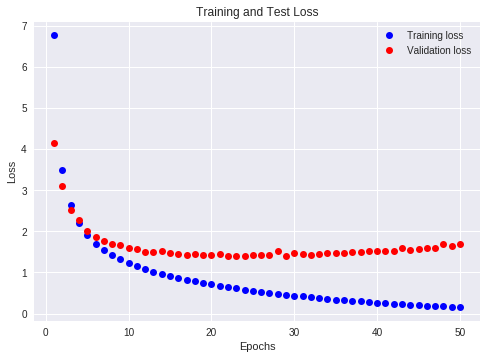

In [79]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_range = range(1, epochs+1)

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'ro', label='Validation loss')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

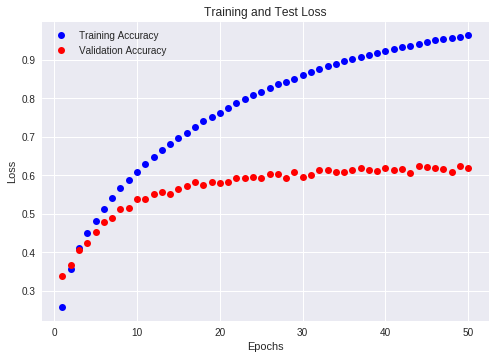

In [80]:
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs_range, acc, 'bo', label='Training Accuracy')
plt.plot(epochs_range, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()